# PRÁCTICA 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

## 1) Leer y representar la imagen gray_bands.tif

formato: TIFF
(ancho, alto) = (7200, 2400)
modo:  L


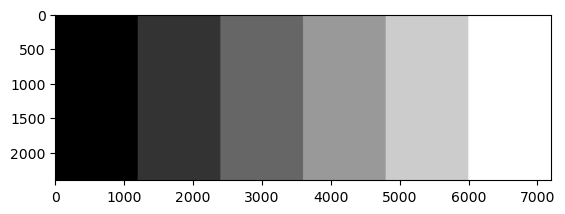

In [18]:
img1 = Image.open('images/gray_bands.tif')

#Se muestran algunas característica de la image a tratar.
print('formato:', img1.format)
print('(ancho, alto) =', img1.size)
print('modo: ', img1.mode)

plt.figure()
plt.imshow(img1, cmap='gray')

In [19]:
#Hay que reducir la imagen, debido a que más adelante nos será molesto trabajar con una imagen de tanto tamaño.
factor = 10
img1_reduc = img1.reduce(factor)
print('(ancho, alto) =', img1_reduc.size)
img1 = np.array(img1_reduc, dtype='float')
img1 = img1/img1.max() #Normalizo la imagen porque me es más cómodo trabajar así. Los motivos se explicaran más adelante.

(ancho, alto) = (720, 240)


## 2) Detectar y representar los bordes con un operador de gradiente

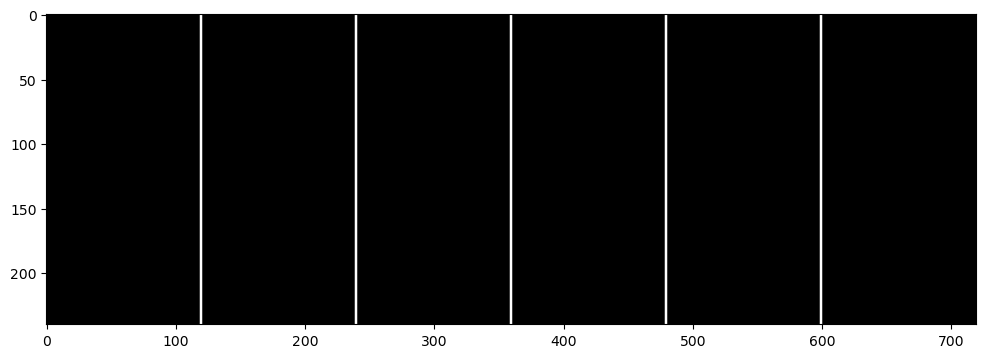

In [20]:
plt.figure(figsize=(12, 6))
img1_prewitt = filters.prewitt(img1) #Esta función es la que permite aplicar dicho operador.
plt.imshow(img1_prewitt, cmap='gray')

## 3) Detectar y representar los bordes con el operador de laplaciana

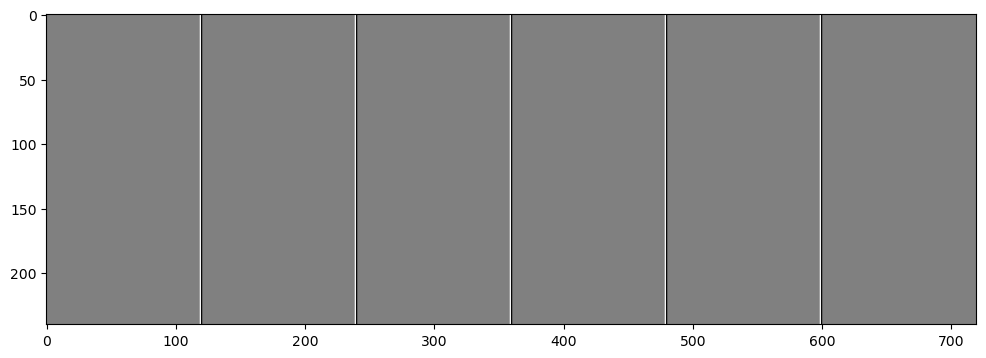

In [5]:
img_lpl = laplace(img1) #Esta función es la que permite aplicar dicho operador.
plt.figure(figsize=(12, 6))
plt.imshow(img_lpl, cmap='gray')

La transformada laplaciana resalta bordes detectando cambios bruscos de intensidad con la segunda derivada. Esto genera bandas blancas (ascenso), negras (descenso) y grises (sin cambio), representando transiciones en la imagen.

## 4) Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes

In [6]:
def ruidoimg(img, desvtip):
    img = np.array(img, dtype='float') #Se convierte la imagen pasada por parámetros en un array de numpy
    noise = np.random.normal(loc=0.0, scale=desvtip, size= img.shape) #Se genera el ruido (Scale es la desviación típica y Loc es la media)
    img_noise = img + noise #La imagen resultante será la imagen pasada por parámetros + el ruido generado con la desv. típica aportada.
    return img_noise

Text(0.5, 1.0, 'Desv. típca 1.0')

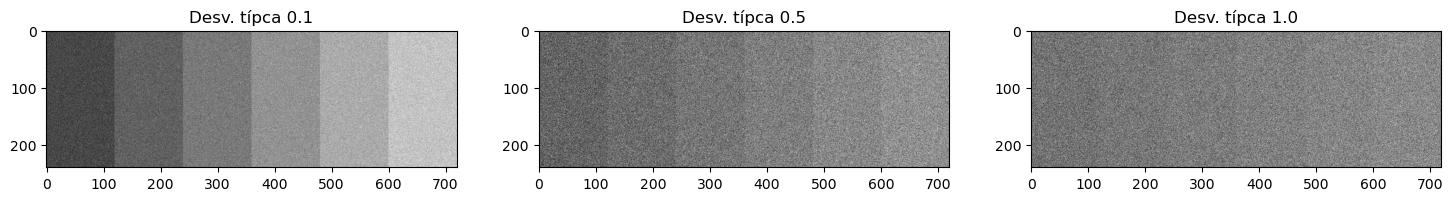

In [7]:
#Se generan tres imágenes con distintos valores de desv. típica
img1_noise = ruidoimg(img1, 0.1)
img2_noise = ruidoimg(img1, 0.5)
img3_noise = ruidoimg(img1, 1.0)
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.imshow(img1_noise, cmap = 'gray')
plt.title('Desv. típca 0.1')
plt.subplot(132)
plt.imshow(img2_noise, cmap = 'gray')
plt.title('Desv. típca 0.5')
plt.subplot(133)
plt.imshow(img3_noise, cmap = 'gray')
plt.title('Desv. típca 1.0')

Los valores de desviación típica estan entre 0 y 1 ya que la imagen ya se encentra normalizada. 

## 5) Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado

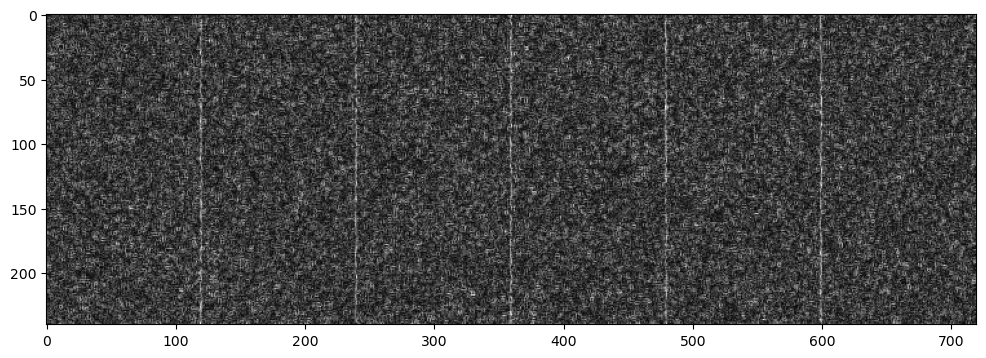

In [35]:
# Configuramos el tamaño de la figura para la visualización
plt.figure(figsize=(12, 6))

# Aplicamos el filtro de Prewitt a la imagen con ruido.
# Este filtro es un detector de bordes que calcula el gradiente de intensidad de la imagen en direcciones horizontales y verticales.
# 'img1_noise' es la imagen con ruido sobre la que se aplica el filtro.
img1_prewitt_noise = filters.prewitt(img1_noise)

# Mostramos la imagen procesada con el filtro de Prewitt en escala de grises.
# 'cmap='gray'' asegura que los valores se representen en tonos de gris.
plt.imshow(img1_prewitt_noise, cmap='gray')


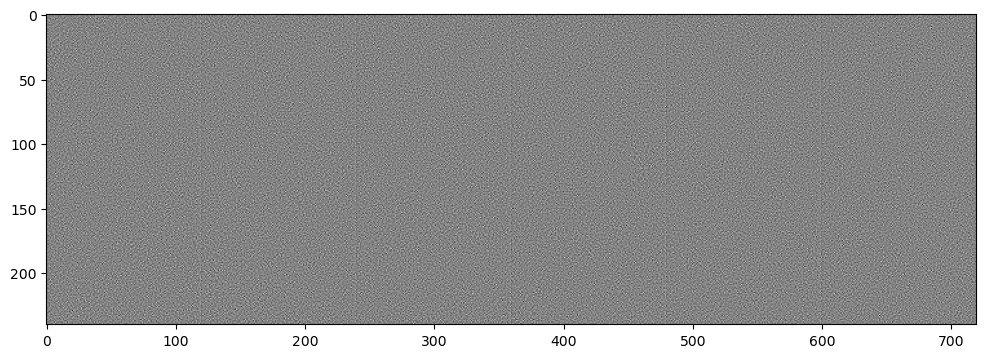

In [36]:
# Aplico el operador Laplaciano a la imagen con ruido (img1_noise).
# El operador Laplaciano es un filtro que resalta bordes detectando cambios en la segunda derivada de la intensidad de la imagen.
# Esto permite identificar transiciones bruscas en la imagen, pero es sensible al ruido.
img_lpl_noise = laplace(img1_noise)

# Configuro el tamaño de la figura para visualizar mejor el resultado.
plt.figure(figsize=(12, 6))

# Muestro la imagen procesada con el operador Laplaciano en escala de grises.
# 'cmap='gray'' asegura que los valores se visualicen como intensidades de gris.
plt.imshow(img_lpl_noise, cmap='gray')


Los filtros basados en derivadas, como la laplaciana, son sensibles al ruido porque amplifican pequeñas variaciones, generando falsos bordes. La laplaciana, al aplicar la segunda derivada, agrava este efecto, dificultando la distinción de zonas en imágenes con ruido.

## 6) Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. ¿Podemos ahora detectar los bordes? Discutir el resultado

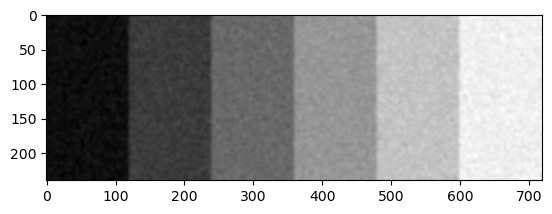

In [37]:
# Aplico un filtro gaussiano a la imagen ruidosa (img1_noise) usando la función gaussian_filter.
# El filtro gaussiano suaviza la imagen al reducir el ruido, lo que facilita la detección de bordes al eliminar pequeñas variaciones.
# El parámetro '2' indica la desviación estándar (sigma) de la función gaussiana, controlando el nivel de suavizado.
img1_noise_gaussfil = gaussian_filter(img1_noise, 2)

# Muestro la imagen suavizada con el filtro gaussiano en escala de grises.
# 'cmap='gray'' asegura que los niveles de intensidad se representen en tonos de gris.
plt.imshow(img1_noise_gaussfil, cmap='gray')


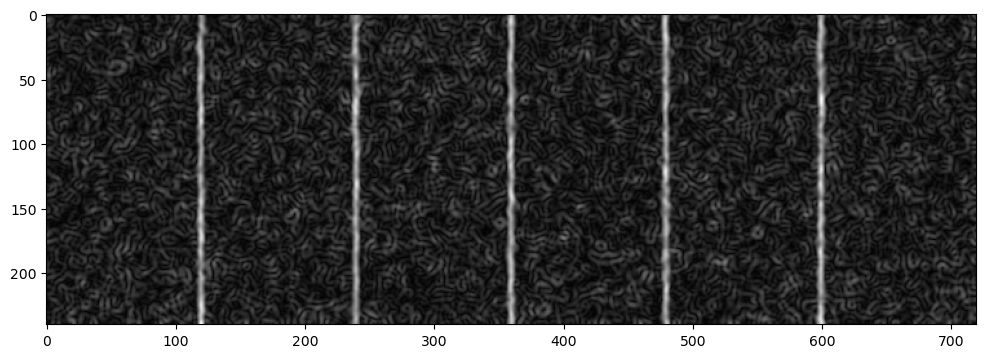

In [38]:
# Configuro el tamaño de la figura para visualizar mejor el resultado.
plt.figure(figsize=(12, 6))

# Aplico el operador de Prewitt a la imagen suavizada con el filtro gaussiano (img1_noise_gaussfil).
# El operador de Prewitt es un detector de bordes que calcula aproximaciones al gradiente de intensidad en direcciones horizontales y verticales.
# Al aplicarlo sobre la imagen suavizada, se reducen los efectos del ruido que podrían interferir en la detección de bordes.
img1_prewitt_noise = filters.prewitt(img1_noise_gaussfil)

# Muestro la imagen resultante, procesada con el operador de Prewitt, en escala de grises.
# 'cmap='gray'' asegura que los bordes detectados se visualicen en tonos de gris.
plt.imshow(img1_prewitt_noise, cmap='gray')


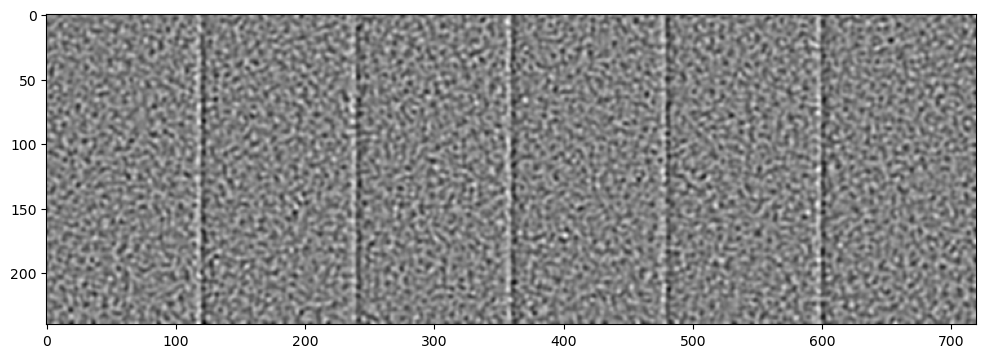

In [39]:
# Aplico el operador Laplaciano a la imagen suavizada con el filtro gaussiano (img1_noise_gaussfil).
# El operador Laplaciano resalta los bordes al detectar cambios en la segunda derivada de la imagen.
# Al aplicar este filtro después del suavizado con Gaussiano, se reduce el impacto del ruido, mejorando la detección de bordes.
img_lpl_noise = laplace(img1_noise_gaussfil)

# Configuro el tamaño de la figura para visualizar mejor el resultado.
plt.figure(figsize=(12, 6))

# Muestro la imagen resultante, procesada con el operador Laplaciano, en escala de grises.
# 'cmap='gray'' asegura que los bordes detectados se representen en tonos de gris.
plt.imshow(img_lpl_noise, cmap='gray')


Los operadores mejoran la detección de bordes relevantes, haciéndolos distinguibles, aunque aún captan parte del ruido presente en la imagen.

## 7) Aplicar el detector de Canny a las dos imágenes reales (building.tif y head_CT.tif). Discutir el resultado y los parámetros empleados.

formato: TIFF
(ancho, alto) = (1114, 834)
modo:  L


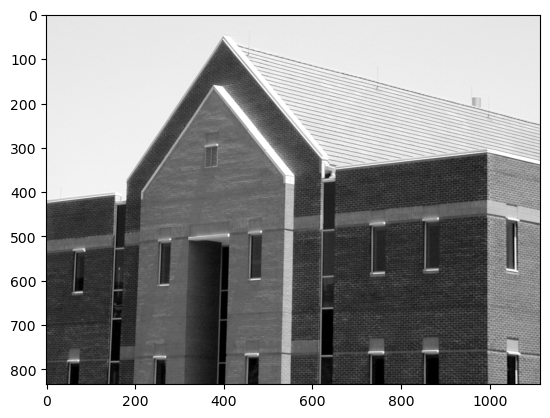

In [30]:
img2 = Image.open('images/building.tif')

print('formato:', img2.format)
print('(ancho, alto) =', img2.size)
print('modo: ', img2.mode)

plt.figure()
plt.imshow(img2, cmap='gray')
img2 = np.array(img2)

formato: TIFF
(ancho, alto) = (512, 512)
modo:  L


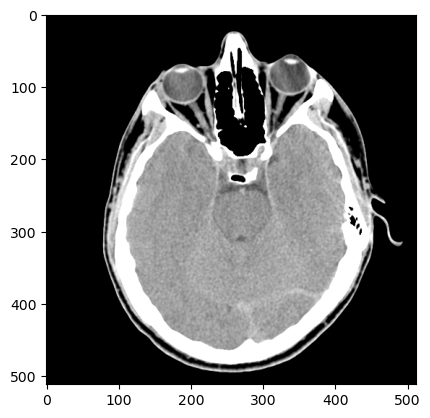

In [31]:
img3 = Image.open('images/head_CT.tif')

print('formato:', img3.format)
print('(ancho, alto) =', img3.size)
print('modo: ', img3.mode)

plt.figure()
plt.imshow(img3, cmap='gray')
img3 = np.array(img3)

In [40]:
# Se aplica el detector de bordes de Canny en la imagen 'img2' (una imagen de un edificio) con un valor de sigma = 2.
# El valor de sigma controla el suavizado antes de la detección de bordes, y un sigma de 2 suaviza más la imagen, ayudando a eliminar ruido.
canny_building = feature.canny(img2, sigma=2)

# Se aplica el detector de bordes de Canny en la imagen 'img3' (una imagen de una cabeza) con un valor de sigma = 1.
# Un sigma más bajo (1) proporciona mayor precisión en la detección de bordes finos, como los detalles de la cabeza.
canny_head = feature.canny(img3, sigma=1)


Text(0.5, 1.0, 'Canny filter, $\\sigma=1$')

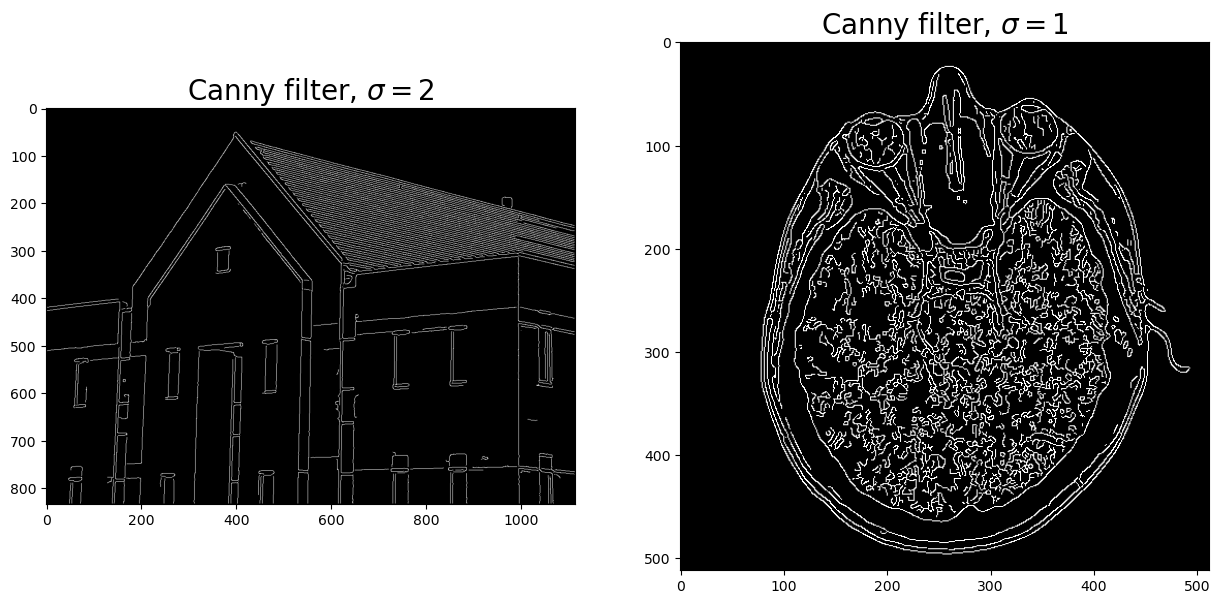

In [41]:
# Configuro el tamaño de la figura para mostrar las dos imágenes lado a lado.
plt.figure(figsize=(15, 10))

# Subgráfico 1: Muestra la imagen procesada con el filtro de Canny y sigma=2 (imagen del edificio).
# La opción '121' indica que se colocará en la primera posición de una rejilla 1x2.
plt.subplot(121)
plt.imshow(canny_building, cmap='gray')  # Mostramos la imagen en escala de grises.
plt.title(r'Canny filter, $\sigma=2$', fontsize=20)  # Añadimos un título con una fórmula para mostrar el valor de sigma.

# Subgráfico 2: Muestra la imagen procesada con el filtro de Canny y sigma=1 (imagen de la cabeza).
# La opción '122' indica que se colocará en la segunda posición de una rejilla 1x2.
plt.subplot(122)
plt.imshow(canny_head, cmap='gray')  # Mostramos la imagen en escala de grises.
plt.title(r'Canny filter, $\sigma=1$', fontsize=20)  # Título con el valor de sigma.


En el detector de Canny, un sigma bajo permite detectar bordes con alta precisión, pero también amplifica el ruido. Por ello, se ajusta según el objetivo: un sigma mayor simplifica detalles (como siluetas), mientras que uno menor resalta contornos más finos (como los de la corteza cerebral).